In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.colors import ListedColormap

%matplotlib inline


plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import gc

sns.set()
%matplotlib inline

import sys

DISPLAY_MAX_ROWS = 20 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 17

C:\Users\ibnee\AppData\Local\Temp\ipykernel_12640\946797910.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])
C:\Users\ibnee\AppData\Local\Temp\ipykernel_12640\946797910.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
X_train = np.loadtxt("samsung_train.txt")
y_train = np.loadtxt("samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("samsung_test.txt")
y_test = np.loadtxt("samsung_test_labels.txt").astype(int)

In [5]:
# Проверим размерности
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [7]:
# Ваш код здесь
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [8]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [9]:
n_classes = np.unique(y).size
n_classes

6

In [10]:
#Ответ: 6 - лежит

In [11]:
# Ваш код здесь
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled, X

(array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
         -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
        [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
         -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
        [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
         -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
        ...,
        [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
         -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
        [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
         -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
        [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
         -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]]),
 array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
          0.17994061, -0.05862692],
        [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
          0.18028889, -0.05431672],
        [ 0.27965306, -0.

In [12]:
# Ваш код здесь
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

In [13]:
# Ваш код здесь
print("Ответ №1: ",pca.n_components_);

Ответ №1:  65


In [14]:
# Ваш код здесь
first_component_variance = pca.explained_variance_ratio_[0]
percentage = round(first_component_variance * 100)
print("Ответ №2: ", percentage);

Ответ №2:  51


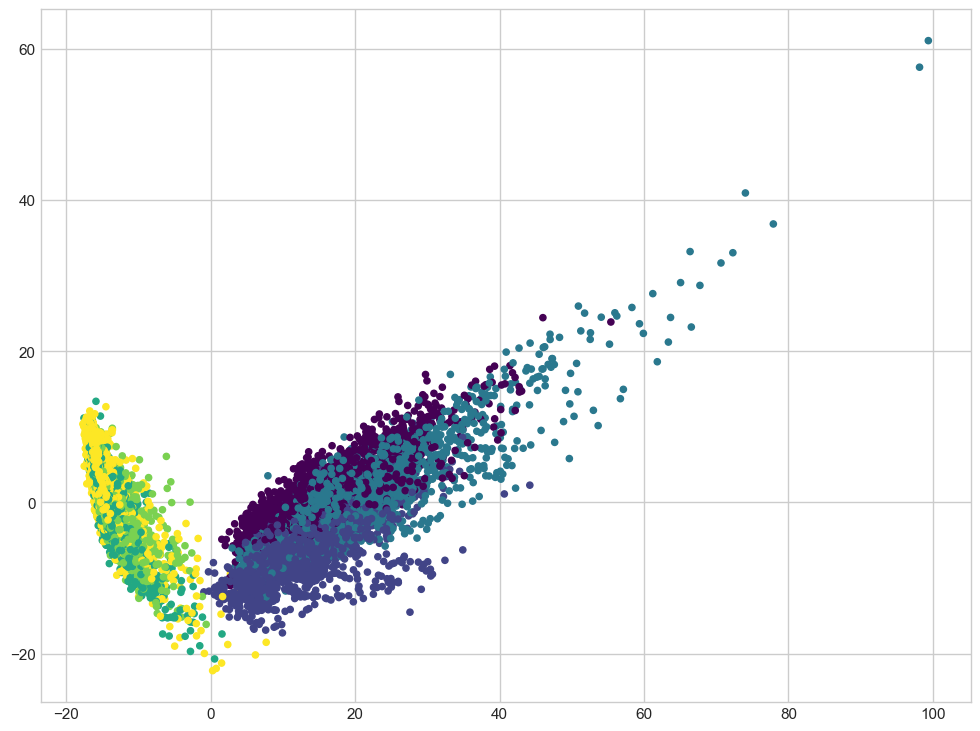

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis')

In [16]:
# №3 Ответ: 2

<function matplotlib.pyplot.show(close=None, block=None)>

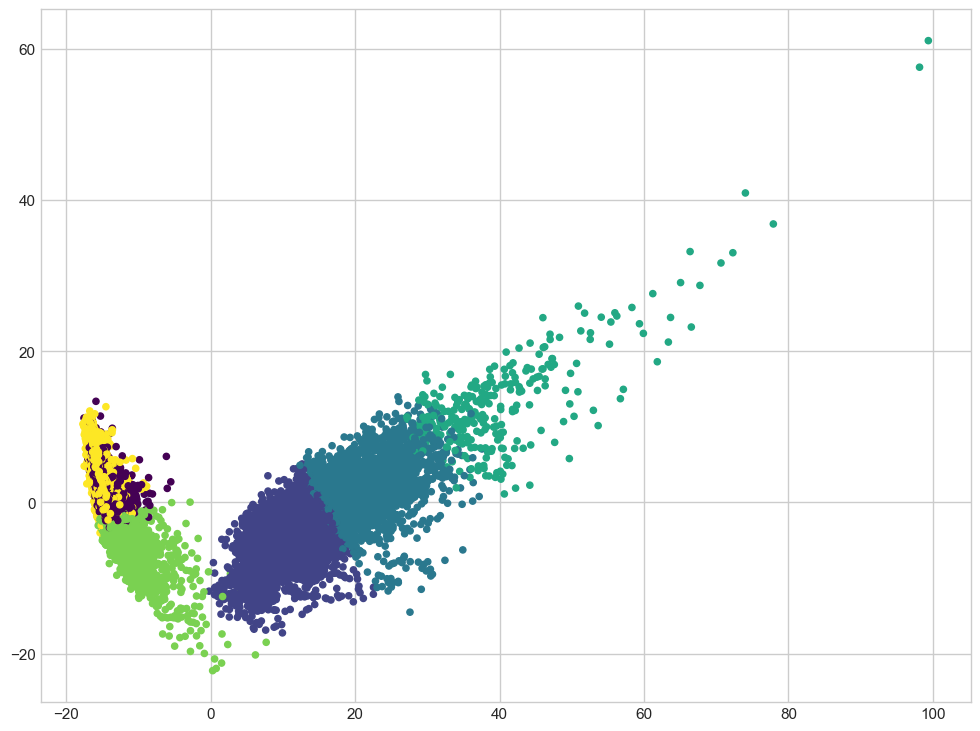

In [17]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=20)
plt.show

In [18]:
tab = pd.crosstab(y, kmeans.labels_, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице',
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,903,741,78,0,0,1722
подъем вверх по лестнице,0,1241,296,5,2,0,1544
спуск по лестнице,0,320,890,196,0,0,1406
сидение,1235,1,0,0,450,91,1777
стояние,1344,0,0,0,562,0,1906
лежание,52,5,0,0,329,1558,1944
все,2631,2470,1927,279,1343,1649,10299


In [19]:
# №4 Ответ: перечисленные варианты не подходят

  0%|          | 0/6 [00:00<?, ?it/s]

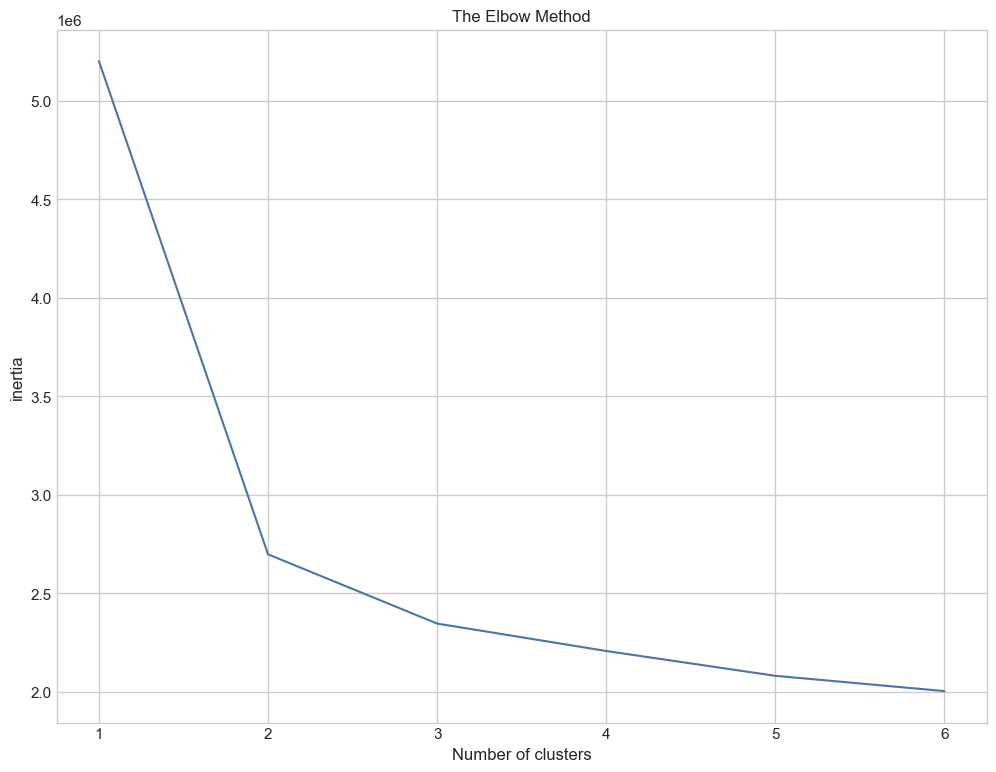

In [20]:
# Ваш код здесь
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 17)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, n_classes + 1), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [21]:
# №5 Ответ: 2

In [22]:
ag = AgglomerativeClustering(n_clusters=n_classes,
                             linkage='ward').fit(X_pca)
X_ag = kmeans.fit_transform(X_pca)

In [23]:
# Ваш код здесь
from sklearn.metrics.cluster import adjusted_rand_score

kmeans_score = adjusted_rand_score(y, kmeans.labels_)
ag_score = adjusted_rand_score(y, ag.labels_)

print(kmeans_score)
print(ag_score)

0.42009695550004794
0.49362763373004886


In [24]:
# №6 Ответ: все варианты

In [25]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform (X_test)

In [33]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
best_svc = GridSearchCV(svc, param_grid=svc_params, cv=3)
best_svc.fit(X_train_scaled, y_train)

print('Best params: ', best_svc.best_params_)
print('Best score: ', best_svc.best_score_)

Best params:  {'C': 0.1}
Best score:  0.9382506099134881


In [ ]:
# №7 Ответ: 0.1

In [27]:
y_predicted = best_svc.predict(X_test_scaled)
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице',
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,494,2,0,0,0,0,496
подъем вверх по лестнице,12,459,0,0,0,0,471
спуск по лестнице,2,3,414,1,0,0,420
сидение,0,4,0,426,61,0,491
стояние,0,0,0,15,517,0,532
лежание,0,0,0,0,11,526,537
все,508,468,414,442,589,526,2947


In [28]:
# №8 Ответ: по точности – сидение, по полноте – стояние

In [31]:
# №9 Ответ: 4%

In [32]:
# №10 Ответ: 2 и 3